In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
sns.set_style("whitegrid")
sns.set()

In [5]:
df = pd.read_csv('house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data = df.drop(["id","date"],axis=1) 
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
print("Summary Statistics:\n")
sumary = data.describe(percentiles=[])
print(np.transpose(np.round(sumary)))

Summary Statistics:

                 count      mean       std      min       50%        max
price          21613.0  540088.0  367127.0  75000.0  450000.0  7700000.0
bedrooms       21613.0       3.0       1.0      0.0       3.0       33.0
bathrooms      21613.0       2.0       1.0      0.0       2.0        8.0
sqft_living    21613.0    2080.0     918.0    290.0    1910.0    13540.0
sqft_lot       21613.0   15107.0   41421.0    520.0    7618.0  1651359.0
floors         21613.0       1.0       1.0      1.0       2.0        4.0
waterfront     21613.0       0.0       0.0      0.0       0.0        1.0
view           21613.0       0.0       1.0      0.0       0.0        4.0
condition      21613.0       3.0       1.0      1.0       3.0        5.0
grade          21613.0       8.0       1.0      1.0       7.0       13.0
sqft_above     21613.0    1788.0     828.0    290.0    1560.0     9410.0
sqft_basement  21613.0     292.0     443.0      0.0       0.0     4820.0
yr_built       21613.0    1971

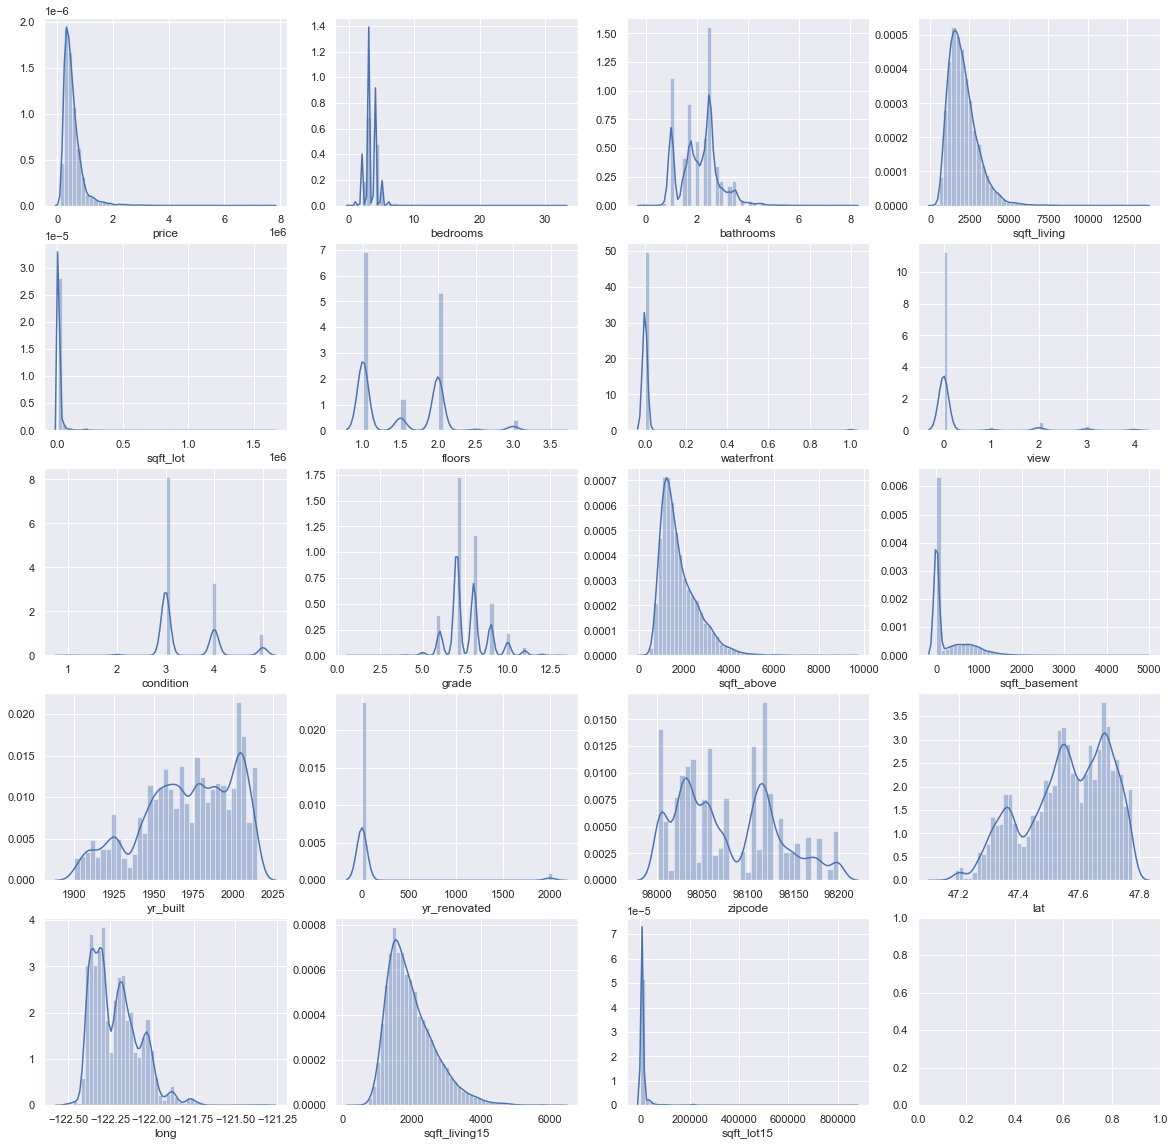

In [16]:
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
for ax, feature in zip(axes.flat, data.columns):
    sns.distplot(data[feature], ax=ax)

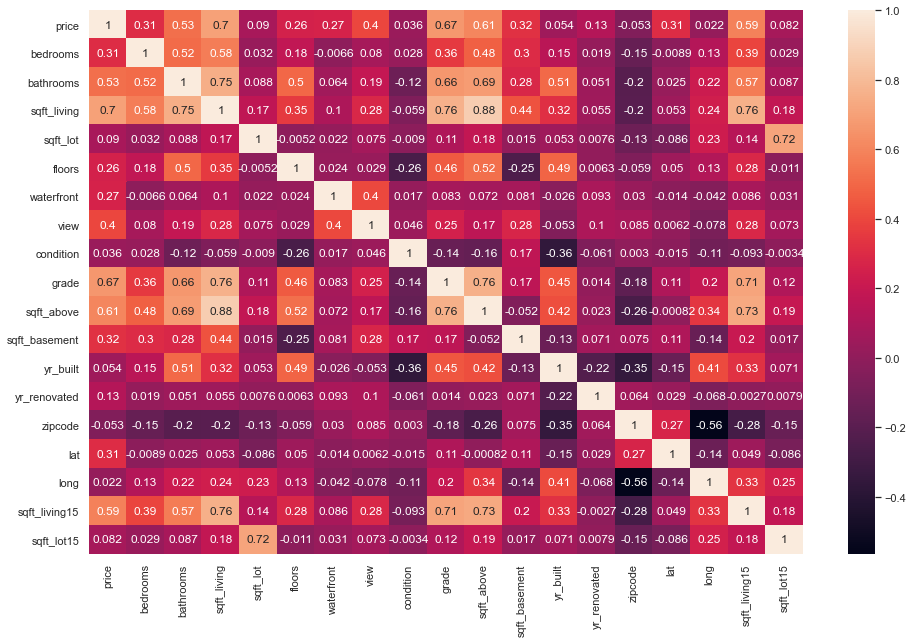

In [21]:
#Heatmap plot for correlation
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True)

In [28]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [30]:
data_sqft = data.filter(regex='sqft').copy()

In [31]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(data_sqft)

No Clusters = 2  Silhouette =  0.436
No Clusters = 3  Silhouette =  0.426
No Clusters = 4  Silhouette =  0.405
No Clusters = 5  Silhouette =  0.385
No Clusters = 6  Silhouette =  0.369
No Clusters = 7  Silhouette =  0.371
No Clusters = 8  Silhouette =  0.351
No Clusters = 9  Silhouette =  0.355
No Clusters = 10  Silhouette =  0.329
No Clusters = 11  Silhouette =  0.305
No Clusters = 12  Silhouette =  0.284
No Clusters = 13  Silhouette =  0.29
No Clusters = 14  Silhouette =  0.285
No Clusters = 15  Silhouette =  0.267
No Clusters = 16  Silhouette =  0.284
No Clusters = 17  Silhouette =  0.26
No Clusters = 18  Silhouette =  0.263
No Clusters = 19  Silhouette =  0.251


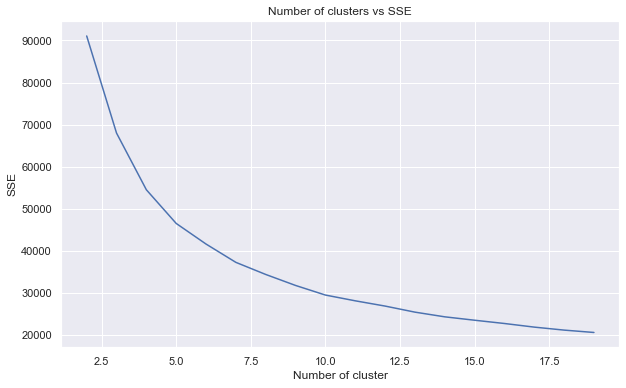

In [32]:
clusters = 20
sse = {}

for i in range(2, clusters):
    
    kmeans = KMeans(n_clusters=i,init="k-means++", n_init = 10, max_iter= 100, random_state=42, n_jobs=-1)
    kmeans.fit(X_std) 

    goodness = silhouette_score(X_std,kmeans.predict(X_std)).round(3)
    print("No Clusters =", i," Silhouette = ",goodness)
    
    sse[i] = kmeans.inertia_ #SSE of each point to its centroid
    
plt.figure(figsize=(10,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.title("Number of clusters vs SSE")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

No Clusters = 2  Silhouette =  0.223
No Clusters = 3  Silhouette =  0.153
No Clusters = 4  Silhouette =  0.151
No Clusters = 5  Silhouette =  0.159
No Clusters = 6  Silhouette =  0.166
No Clusters = 7  Silhouette =  0.154
No Clusters = 8  Silhouette =  0.162
No Clusters = 9  Silhouette =  0.177
No Clusters = 10  Silhouette =  0.179
No Clusters = 11  Silhouette =  0.172
No Clusters = 12  Silhouette =  0.171
No Clusters = 13  Silhouette =  0.174
No Clusters = 14  Silhouette =  0.168
No Clusters = 15  Silhouette =  0.164
No Clusters = 16  Silhouette =  0.159
No Clusters = 17  Silhouette =  0.158
No Clusters = 18  Silhouette =  0.158
No Clusters = 19  Silhouette =  0.16


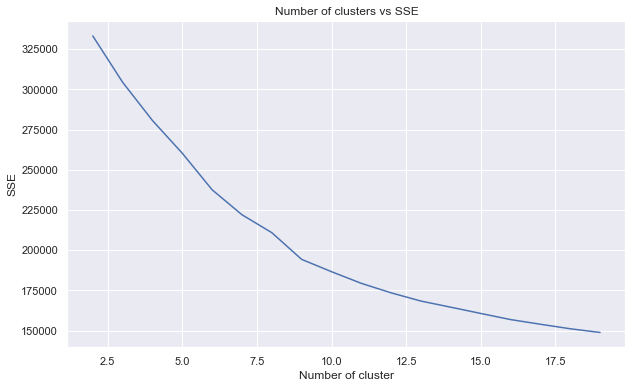

In [29]:
clusters = 20
sse = {}

for i in range(2, clusters):
    
    kmeans = KMeans(n_clusters=i,init="k-means++", n_init = 10, max_iter= 100, random_state=42, n_jobs=-1)
    kmeans.fit(X_std) 

    goodness = silhouette_score(X_std,kmeans.predict(X_std)).round(3)
    print("No Clusters =", i," Silhouette = ",goodness)
    
    sse[i] = kmeans.inertia_ #SSE of each point to its centroid
    
plt.figure(figsize=(10,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.title("Number of clusters vs SSE")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

No Clusters = 2  Silhouette =  0.726
No Clusters = 3  Silhouette =  0.593
No Clusters = 4  Silhouette =  0.574
No Clusters = 5  Silhouette =  0.531
No Clusters = 6  Silhouette =  0.531
No Clusters = 7  Silhouette =  0.517
No Clusters = 8  Silhouette =  0.501
No Clusters = 9  Silhouette =  0.501


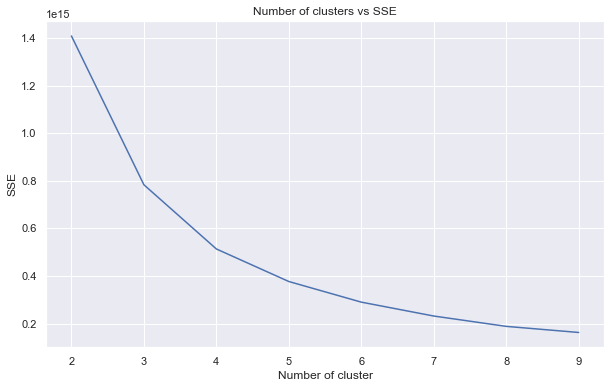

In [22]:
clusters = 10
sse = {}

for i in range(2, clusters):
    
    kmeans = KMeans(n_clusters=i,init="k-means++", n_init = 10, max_iter= 100)
    kmeans.fit(X_std) 

    goodness = silhouette_score(data,kmeans.predict(data)).round(3)
    print("No Clusters =", i," Silhouette = ",goodness)
    
    sse[i] = kmeans.inertia_ #SSE of each point to its centroid
    
plt.figure(figsize=(10,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.title("Number of clusters vs SSE")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [33]:
clusters = 4

kmeans = KMeans(n_clusters=clusters,init="k-means++", n_init = 10, max_iter= 100)
kmeans.fit(data) 

goodness = silhouette_score(data,kmeans.predict(data)).round(3)
print("No Clusters =", clusters," Silhouette = ",goodness)

No Clusters = 4  Silhouette =  0.574


In [34]:
temp = data
temp["Cluster"] = kmeans.predict(data)
# find number of members in each cluster
count = temp.groupby('Cluster')['Cluster'].count()
# find cluster averages
cluster_means = np.round(temp.groupby(['Cluster']).mean(),decimals=3)

In [35]:
cluster_means['Count'] = count
print(np.transpose(cluster_means))

Cluster                 0            1            2           3
price          345286.183  1358833.100  2806108.842  689374.548
bedrooms            3.158        4.032        4.353       3.612
bathrooms           1.859        3.073        3.874       2.363
sqft_living      1676.933     3632.033     5094.153    2456.489
sqft_lot        12017.858    23428.883    23010.053   18997.637
floors              1.388        1.801        1.882       1.622
waterfront          0.001        0.048        0.237       0.006
view                0.080        1.126        2.011       0.312
condition           3.384        3.466        3.505       3.443
grade               7.125        9.637       10.753       8.188
sqft_above       1469.879     2986.773     4058.753    2093.807
sqft_basement     207.054      645.260     1035.400     362.681
yr_built         1970.325     1975.282     1972.258    1971.461
yr_renovated       56.826      234.204      305.079     102.416
zipcode         98079.405    98069.551  

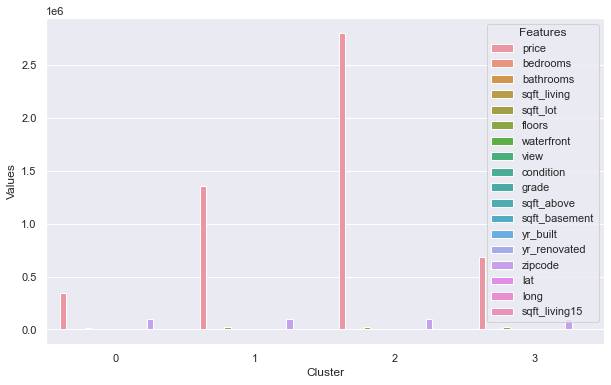

In [37]:
#put table into dataframe, reshape for barplot
cluster_df = pd.DataFrame(np.transpose(cluster_means)).iloc[0:18,:] #drop count
cluster_df = cluster_df.reset_index()
cluster_df = cluster_df.rename(columns={'index': 'Features'})
clus_df_melt = pd.melt(cluster_df, id_vars="Features", var_name="Cluster", value_name="Values")

plt.figure(figsize=(10,6))
ax = sns.barplot(data=clus_df_melt,x="Cluster",y="Values",hue="Features")